# Libraries

In [1]:
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))
suppressWarnings(suppressPackageStartupMessages(library(haven)))
suppressWarnings(suppressPackageStartupMessages(library(bbplot)))

# Creating new scales in the ILSD dataset

Load the ILSD dataset

In [2]:
ilsd <- read_dta("data/ilsd jun2018 (con scale).dta")

Let's create:
- the logit left right scale
- the "classic" economic scale
- the economic ratio
- the logit economic scale
- the "classic" gal/tan scale
- the gal/tan ratio
- the logit gal/tan scale
- the "classic" economic gal/tan
- the economic gal/tan ratio
- the logit economic gal/tan scale
- a dummy equal to zero when all variables used to create the gal/tan variables are equal to zero

In [3]:
ilsd <- ilsd %>% 
mutate(right = per101 + per104 + per110 + per107 + per401 + per402 + per406 + per410 + per414 + per416 + per601 + per603 + per605 + per609 + per608 + per202,
       left = per102 + per103 + per105 + per106 + per108 + per109 + per403 + per404 + per405 + per408 + per409 + per411 + per412 + per413 + per415 + per417 + per602 + per604 + per606 + per607 + per610 + per611 + per201,
       logit_left_right = log(right + .5) - log(left + .5),
       economic_right = per401 + per402 + per406 + per410 + per414 + per416,
       economic_left = per403 + per404 + per405 + per407 + per408 + per409 + per411 + per412 + per413 + per415 + per417,
       classic_economic = economic_right - economic_left,
       ratio_economic = classic_economic / (economic_right + economic_left),
       logit_economic = log(economic_right + .5) - log(economic_left + .5),
       gal_tan = ((per108 + per608) - (per107 + per607)),
       ratio_gal_tan = gal_tan / (per107 + per108 + per607 + per608),
       logit_gal_tan = log((per108 + per608) + .5) - log((per107 + per607) + .5),
       economic_gal_tan_left = per107 + per405 + per607,
       economic_gal_tan_right = per108 + per406 + per608,
       classic_economic_gal_tan = (economic_gal_tan_right - economic_gal_tan_left),
       ratio_economic_gal_tan = classic_economic_gal_tan / (economic_gal_tan_left + economic_gal_tan_right),
       logit_economic_gal_tan = log(economic_gal_tan_right + .5) - log(economic_gal_tan_left + .5),
       gal_tan_controllo = if_else((per107 == 0 & per108 == 0 & per405 == 0 & per406 == 0 & per607 == 0 & per608 == 0), 1, 0))

Let's have a look at the 6 gal/tan variables

In [12]:
ilsd %>% 
select(per107, per108, per607, per608, gal_tan, ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, ratio_economic_gal_tan, logit_economic_gal_tan)

per107,per108,per607,per608,gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.0000000,0,0.00,0,0.0000000,NaN,0.0000000,0.000000,NaN,0.0000000
0.0000000,0,0.00,0,0.0000000,NaN,0.0000000,0.000000,NaN,0.0000000
0.2638522,0,0.00,0,-0.2638522,-1,-0.4237663,1.055409,0.6666667,0.8678114
0.0000000,0,0.00,0,0.0000000,NaN,0.0000000,0.000000,NaN,0.0000000
0.0000000,0,0.00,0,0.0000000,NaN,0.0000000,0.000000,NaN,0.0000000
0.0000000,0,0.00,0,0.0000000,NaN,0.0000000,0.000000,NaN,0.0000000
0.0000000,0,1.00,0,-1.0000000,-1,-1.0986123,-1.000000,-1.0000000,-1.0986123
0.4300000,0,0.00,0,-0.4300000,-1,-0.6205765,2.320000,0.7295597,1.2512257
0.0000000,0,0.00,0,0.0000000,NaN,0.0000000,0.000000,NaN,0.0000000


The speeches with a null value in the ratio_gal_tan variable have a score equal to zero for all variables used to calculate it (i.e. per107, per108, per607, per608)

In [13]:
ilsd %>% 
filter(is.na(ratio_gal_tan)) %>% 
select(per107, per108, per607, per608, gal_tan, ratio_gal_tan, logit_gal_tan)

per107,per108,per607,per608,gal_tan,ratio_gal_tan,logit_gal_tan
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0


## Distributions of the newly created scales

### Logit left-right scale

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_te

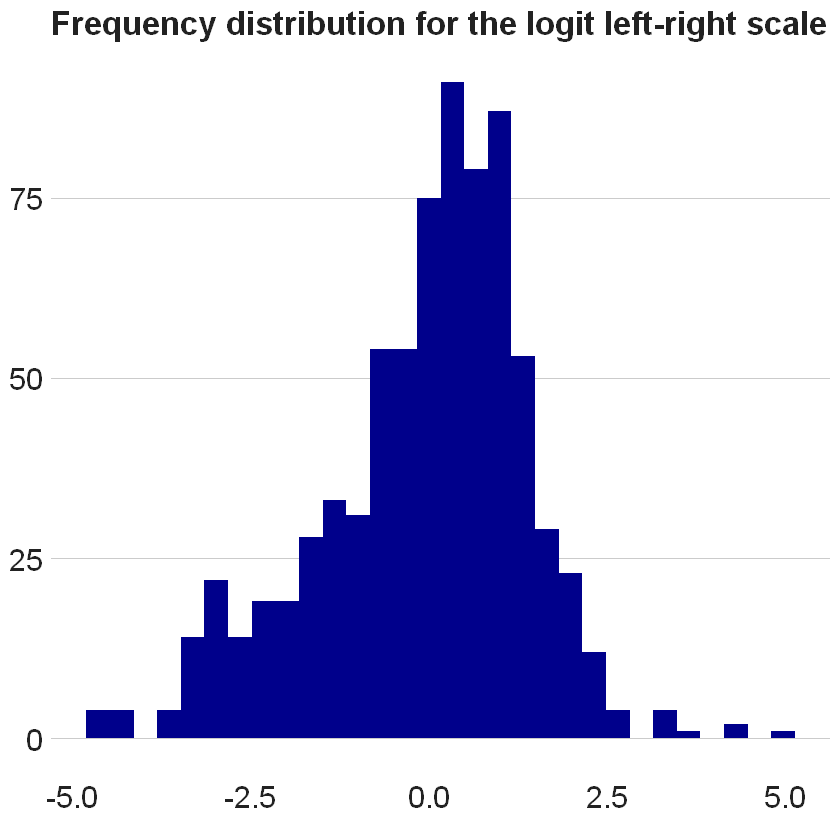

In [4]:
ilsd %>% 
ggplot(aes(logit_left_right)) +
geom_histogram(fill = "dark blue") +
bbc_style() +
labs(title = "Frequency distribution for the logit left-right scale") +
theme(plot.title = element_text(size = 20))

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not fo

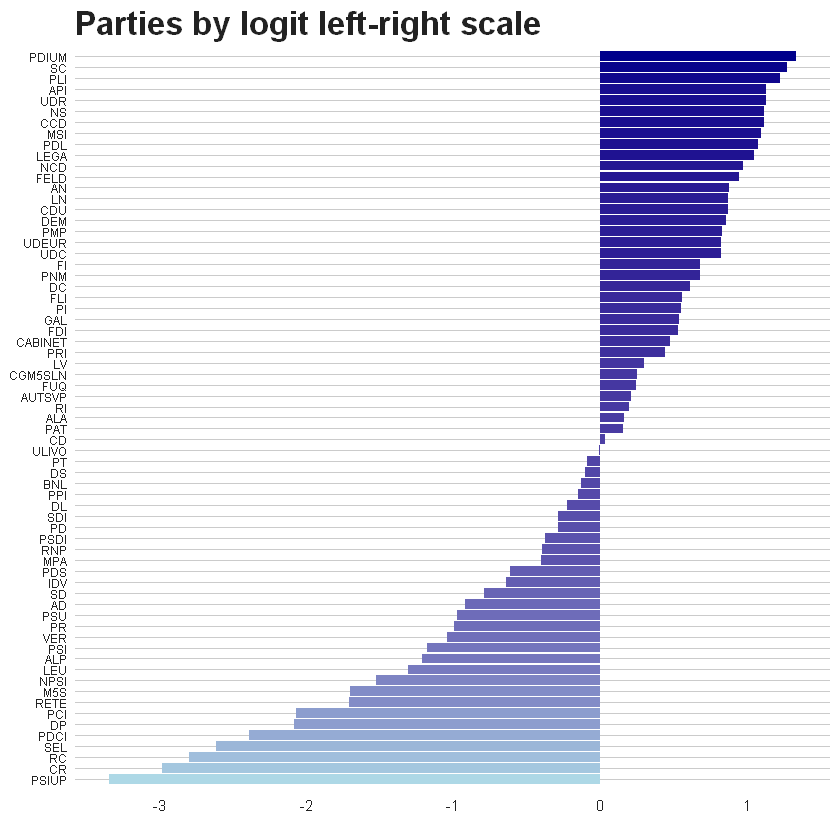

In [5]:
ilsd %>% 
group_by(PARTY) %>% 
summarize(avg_logit_left_right = mean(logit_left_right)) %>% 
arrange(desc(avg_logit_left_right)) %>% 
ggplot(aes(x = fct_reorder(PARTY, avg_logit_left_right), y = avg_logit_left_right, fill = avg_logit_left_right)) +
geom_col() +
coord_flip() +
bbc_style() +
scale_fill_gradient(low = "light blue", high = "dark blue") +
labs(title = "Parties by logit left-right scale") +
theme(plot.title = element_text(size = 20),
      axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      axis.text.x = element_text(size = 9),
      axis.text.y = element_text(size = 7),
      legend.position = "none")

### Logit by economic left-right scale

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"


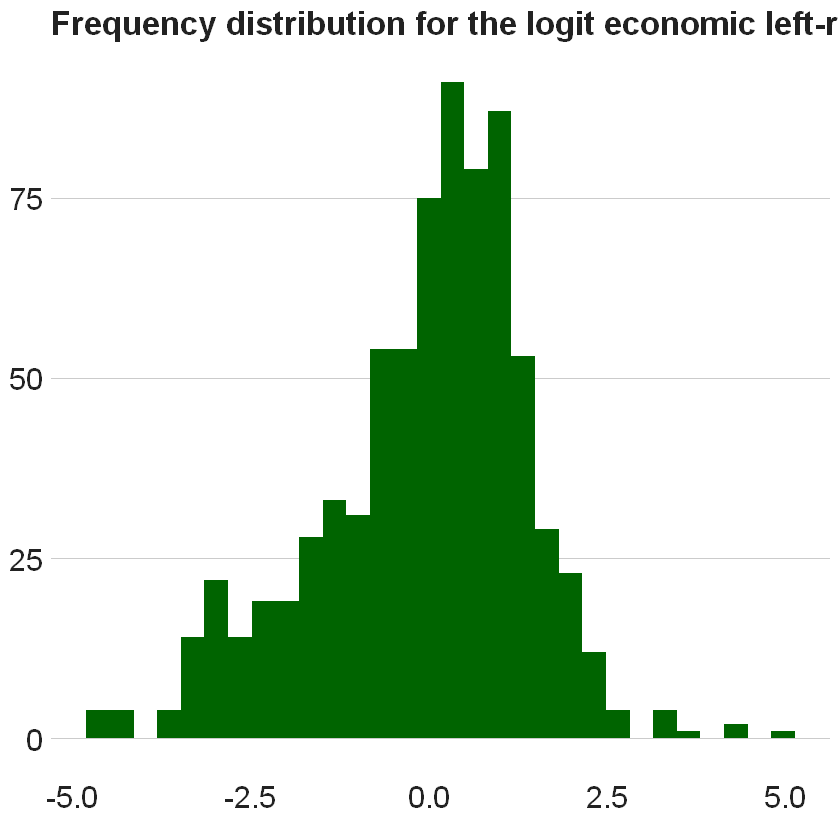

In [6]:
ilsd %>% 
ggplot(aes(logit_left_right)) +
geom_histogram(fill = "dark green") +
bbc_style() +
labs(title = "Frequency distribution for the logit economic left-right scale") +
theme(plot.title = element_text(size = 20))

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"

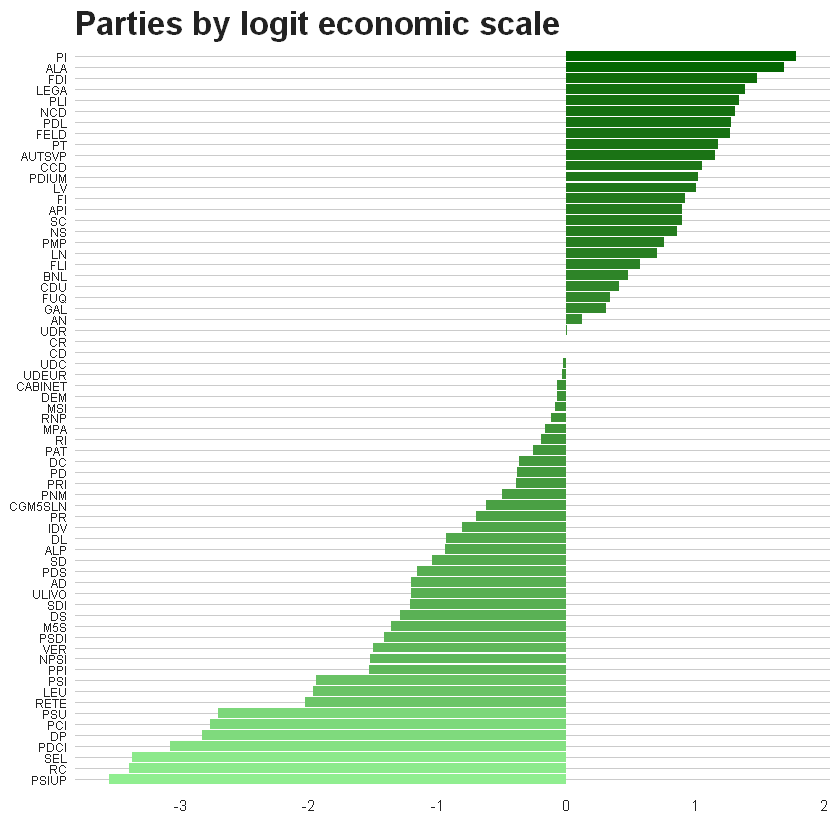

In [7]:
ilsd %>% 
group_by(PARTY) %>% 
summarize(avg_logit_economic = mean(logit_economic)) %>% 
arrange(desc(avg_logit_economic)) %>% 
ggplot(aes(x = fct_reorder(PARTY, avg_logit_economic), y = avg_logit_economic, fill = avg_logit_economic)) +
geom_col() +
coord_flip() +
bbc_style() +
scale_fill_gradient(low = "light green", high = "dark green") +
labs(title = "Parties by logit economic scale") +
theme(plot.title = element_text(size = 20),
      axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      axis.text.x = element_text(size = 9),
      axis.text.y = element_text(size = 7),
      legend.position = "none") 

### Logit GAL/TAN scale

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"


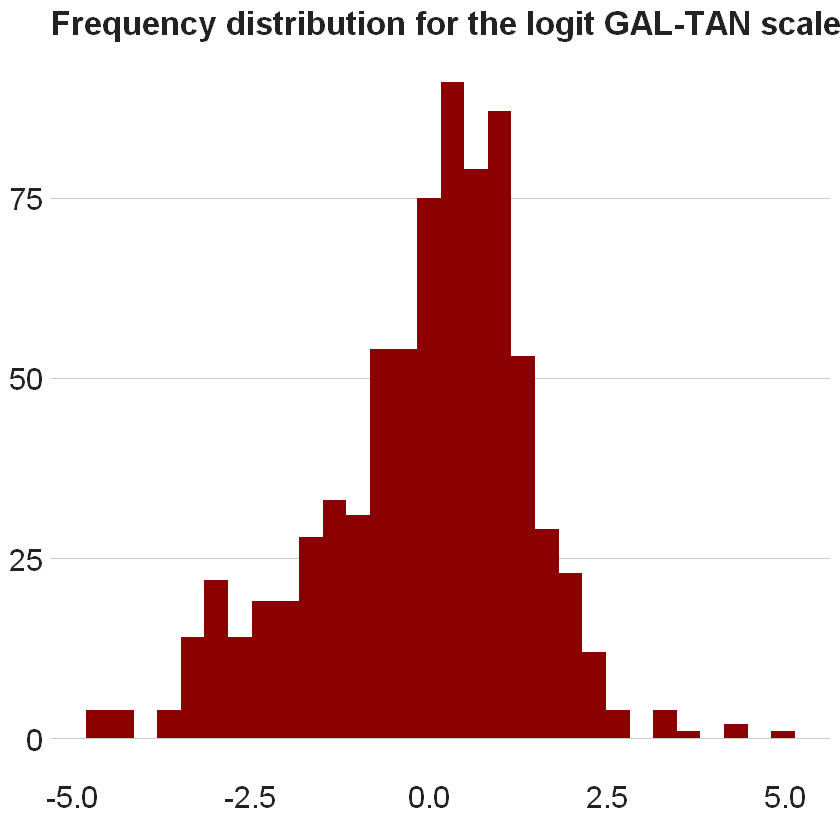

In [8]:
ilsd %>% 
ggplot(aes(logit_left_right)) +
geom_histogram(fill = "dark red") +
bbc_style() +
labs(title = "Frequency distribution for the logit GAL-TAN scale") +
theme(plot.title = element_text(size = 20))

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"

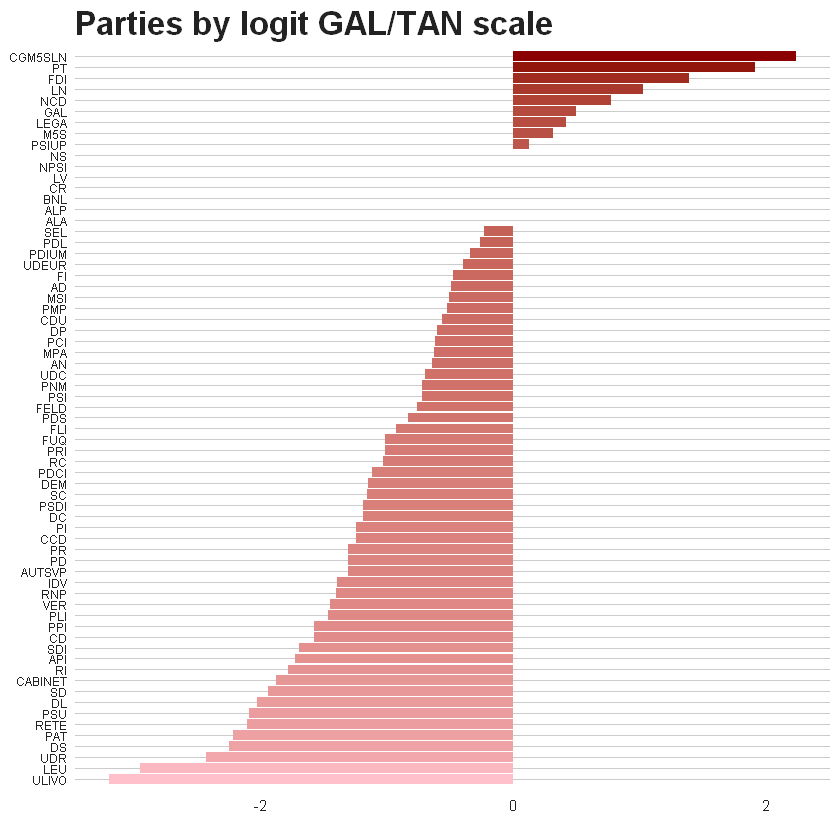

In [9]:
ilsd %>% 
group_by(PARTY) %>% 
summarize(avg_logit_gal_tan = mean(logit_gal_tan)) %>% 
arrange(desc(avg_logit_gal_tan)) %>% 
ggplot(aes(x = fct_reorder(PARTY, avg_logit_gal_tan), y = avg_logit_gal_tan, fill = avg_logit_gal_tan)) +
geom_col() +
coord_flip() +
bbc_style() +
scale_fill_gradient(low = "pink", high = "dark red") +
labs(title = "Parties by logit GAL/TAN scale") +
theme(plot.title = element_text(size = 20),
      axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      axis.text.x = element_text(size = 9),
      axis.text.y = element_text(size = 7),
      legend.position = "none") 

### Logit economic GAL/TAN scale

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"


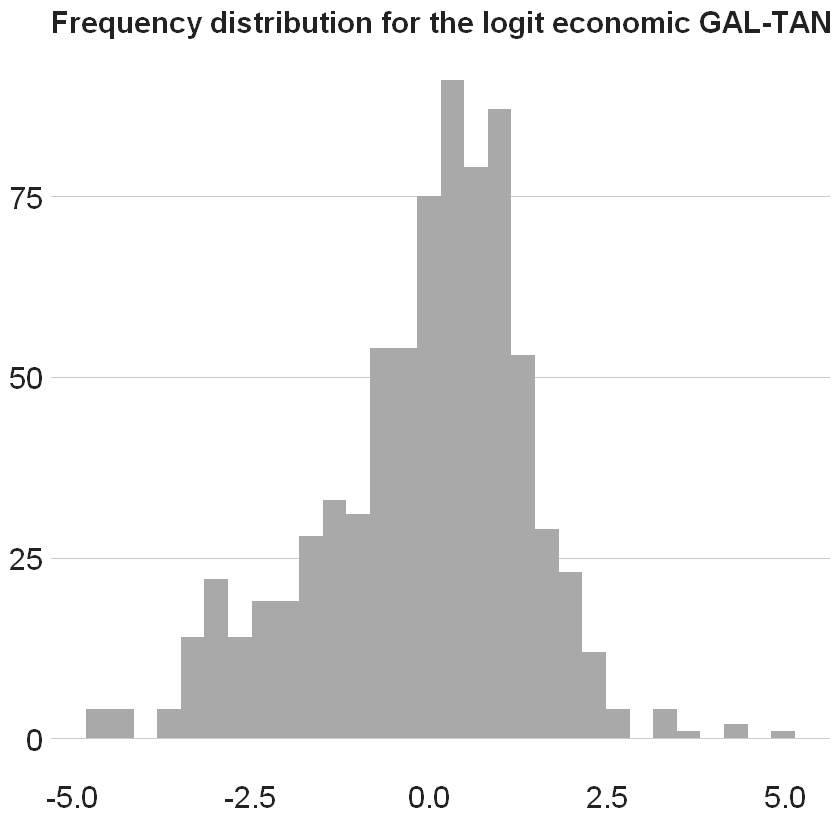

In [10]:
ilsd %>% 
ggplot(aes(logit_left_right)) +
geom_histogram(fill = "dark grey") +
bbc_style() +
labs(title = "Frequency distribution for the logit economic GAL-TAN scale") +
theme(plot.title = element_text(size = 18))

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"

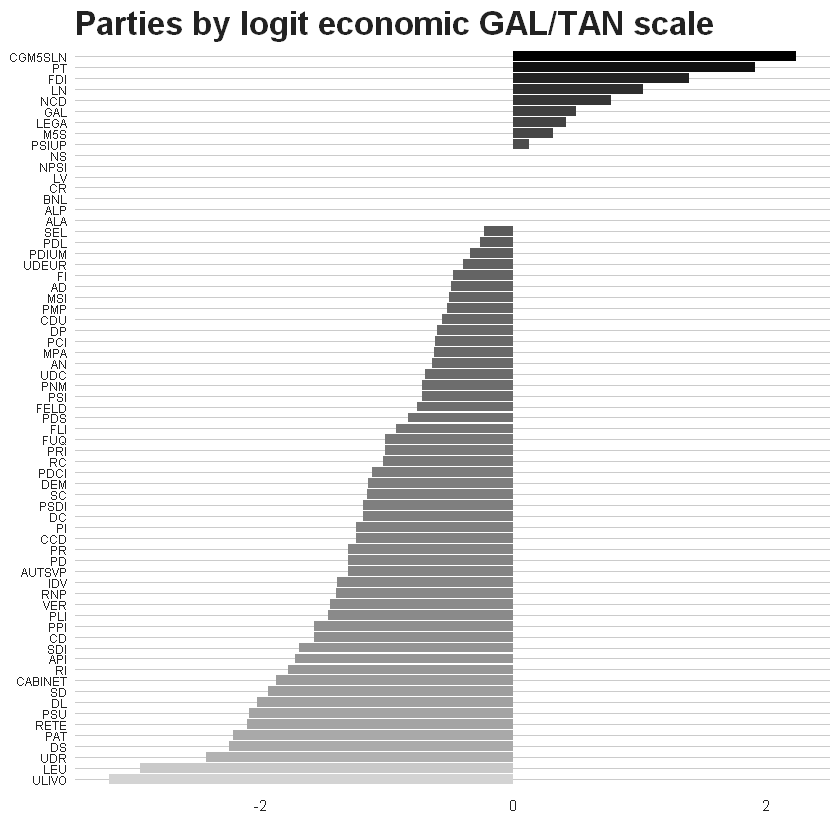

In [11]:
ilsd %>% 
group_by(PARTY) %>% 
summarize(avg_logit_gal_tan = mean(logit_gal_tan)) %>% 
arrange(desc(avg_logit_gal_tan)) %>% 
ggplot(aes(x = fct_reorder(PARTY, avg_logit_gal_tan), y = avg_logit_gal_tan, fill = avg_logit_gal_tan)) +
geom_col() +
coord_flip() +
bbc_style() +
scale_fill_gradient(low = "light gray", high = "black") +
labs(title = "Parties by logit economic GAL/TAN scale") +
theme(plot.title = element_text(size = 20),
      axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      axis.text.x = element_text(size = 9),
      axis.text.y = element_text(size = 7),
      legend.position = "none") 

# Joining the ILSD dataset to the speeches dataset

- LEFT JOIN ILSD to texts ON year AND gruppoP = PARTY
- make party names the same

Load the speeches dataset

In [14]:
load("data/parliamentary_groups2.rds")
texts <- Texts %>% as_tibble()

In [15]:
texts %>% distinct(gruppoP) %>% arrange(gruppoP) %>% pull()

[1] "AN"                                                                                                                                                          
 [2] "AP-CPE-NCD-NCI"                                                                                                                                              
 [3] "CCD"                                                                                                                                                         
 [4] "CCD-CDU"                                                                                                                                                     
 [5] "CD-DN"                                                                                                                                                       
 [6] "CI"                                                                                                                                                          
 [7] "COM/IT/"                                                                                                                                                     
 [8] "COMUNISTA"                                                                                                                                                   
 [9] "DC"                                                                                                                                                          
[10] "DC-PPI"                                                                                                                                                      
[11] "DCA-NPSI"                                                                                                                                                    
[12] "DEM-U"                                                                                                                                                       
[13] "DEMO"                                                                                                                                                        
[14] "DES-CD"                                                                                                                                                      
[15] "DP"                                                                                                                                                          
[16] "DP-COM"                                                                                                                                                      
[17] "DS-U"                                                                                                                                                        
[18] "DS-ULIVO"                                                                                                                                                    
[19] "F-ITA"                                                                                                                                                       
[20] "FDI"                                                                                                                                                         
[21] "FDI-AN"                                                                                                                                                      
[22] "FED/EUR/"                                                                                                                                                    
[23] "FI"                                                                                                                                                          
[24] "FI-PDL"                                                                                                                                                      
[25] "FLD"                                                       

In [16]:
texts %>% 
mutate(gruppoP = case_when(
gruppoP == 'DS-U' ~ 'DS-ULIVO',
gruppoP == 'LEGA-N' ~ 'LEGA',
gruppoP == 'LEGA-NORD-P' ~ 'LEGA',
gruppoP == 'LNA' ~ 'LEGA',
gruppoP == 'LNP' ~ 'LEGA',
gruppoP == 'PD-U' ~ 'PD',
gruppoP == 'PD-ULIVO' ~ 'PD',
gruppoP == 'VERDE' ~ 'VERDI'))

segment tag        
1      14      CORTESE    
2      15      MICELI     
3      18      GERMANI    
4      23      INGRAO     
5      25      TAVIANI    
6      26      INGRAO     
7      28      INGRAO     
8      32      INGRAO     
9      35      INGRAO     
10     37      GASPERI    
11     38      INGRAO     
12     41      INGRAO     
13     44      INGRAO     
14     47      INGRAO     
15     49      INGRAO     
16     51      INGRAO     
17     53      INGRAO     
18     55      INGRAO     
19     59      INGRAO     
20     62      INGRAO     
21     64      TONENGO    
22     68      INGRAO     
23     69      SPIAZZI    
24     70      INGRAO     
25     73      INGRAO     
26     76      INGRAO     
27     79      FABRIANI   
28     80      VITTORIO   
29     81      INVERNIZZI 
30     82      BRUNO      
<U+22EE>      <U+22EE> <U+22EE>   
708812 203     ANDREA     
708813 207     ANDREA     
708814 210     PIERO      
708815 215     RICCARDO   
708816 217     ALESSANDRO 
708817 224     LAURA      
708818 227     LAURA      
708819 230     FRANCESCO  
708820 235     MARIASTELLA
708821 241     MASSIMO    
708822   6     TATEO      
708823  53     GLORIA     
708824  66     GUIDO      
708825  71     MARIA      
708826  75     ANGELA     
708827  85     NICOLA     
708828  88     VITO       
708829  91     SILVANA    
708830  98     SANDRA     
708831 100     LUCA       
708832 108     MARTINA    
708833 115     RAFFAELE   
708834 118     ANTONELLA  
708835 124     LUCIANO    
708836 127     MARIA      
708837 130     SILVIA     
708838 135     GUGLIELMO  
708839 140     BERNARDO   
708840 144     LUCIANO    
708841 147     LUCIANO    
       start                                                                                                                               
1      CORTESE ,  Segreiario ,  legge il provesso                                                                                          
2      MICELI .  Data - l ’ ora tarda e lo stato di                                                                                        
3      GERMANI .  Mi oppongo alla proposta                                                                                                 
4      INGRAO .  Signor Presidente ,  onorevoli                                                                                            
5      TAVIANI ,  Sottosegretario d i  Stato per g l i                                                                                     
6      INGRAO .   .  Onorevole sottosegretario ,  ho                                                                                       
7      INGRAO .  Dicevo che questo avviene                                                                                                 
8      INGRAO .  Onorevoli colleghi ,  abbiamo                                                                                             
9      INGRAO .  Permettete che noi esprimiamo                                                                                             
10     DE GASPERI ,  Presidente del Consiglio                                                                                              
11     INGRAO .  Parleremo dopo della Corea ;                                                                                              
12     INGRAO .  Di fronte a questi fatti ,  quanto                                                                                        
13     INGRAO .  fC proprio così  !  Le potrei leggere la diminuzione della produzione civile                                              
14     INGRAO .  Da parte di tut te  le nazioni .                                                                                          
15     INGRAO .  Mi spiace ,  ma devo smentirla .                                                                                          
16     INGRAO .  Senza diritto di veto :  onorevole                                  

In [17]:
ilsd %>% 
mutate(gruppoP = case_when(
PARTY == 'CD' ~ 'DES-CD',
PARTY == 'CDU' ~ 'CCD-CDU',
PARTY == 'DC' ~ 'DEM-U', #??????
PARTY == 'DL' ~ 'MARGH-U',
PARTY == 'DS' ~ 'DS-ULIVO',
PARTY == 'FLI' ~ 'FLPTP', # Futuro e libertà per il terzo polo
PARTY == 'LN' ~ 'LEGA',
PARTY == 'LV' ~ 'LEGA',
PARTY == 'NCD' ~ 'AP-CPE-NCD-NCI',
PARTY == 'NPSI' ~ 'DCA-NPSI',
PARTY == 'NS' ~ 'NOI SUD-LIBERTA\' ED AUTONOMIA/POPOLARI D\'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA\' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE',
PARTY == 'PDCI' ~ 'COM/IT/',
PARTY == 'PDIUM' ~ 'PDI',
PARTY == 'RI' ~ "RINN/IT", # Rinnovamento Italiano
PARTY == 'RNP' ~ "SOCRAD-RNP",
PARTY == 'SC' ~ "NCI-SCPI-MAIE",
PARTY == 'SD' ~ "SDPSE",
PARTY == 'SDI' ~ "PSDI", #Socialisti Democratici Italiani
PARTY == 'SEL' ~ "SI-SEL-POS-LU",
PARTY == 'UDC' ~ "UNIONE DEI DEMOCRATICI CRISTIANI E DEI DEMOCRATICI DI CENTRO",
PARTY == 'ULIVO' ~ "DS-ULIVO",
PARTY == 'VER' ~ "VERDI",
TRUE ~ PARTY))

Legislature,Years_Legislature,Edate,republic,PARTY_NAME,PARTY,cabinet,investiture_speech,government_id,government_all,⋯,gal_tan,ratio_gal_tan,logit_gal_tan,economic_gal_tan_left,economic_gal_tan_right,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan,gal_tan_controllo,gruppoP
<dbl+lbl>,<chr>,<date>,<dbl+lbl>,<chr>,<chr>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1946-1948,1946-07-01,1,Bnl 1946,BNL,0,1,1,1,⋯,0.0000000,NaN,0.0000000,0.0000000,0.000000,0.000000,NaN,0.0000000,1,BNL
1,1946-1948,1946-07-01,1,DC 1946,DC,0,1,1,1,⋯,0.0000000,NaN,0.0000000,0.0000000,0.000000,0.000000,NaN,0.0000000,1,DEM-U
1,1946-1948,1946-07-01,1,De Gasperi (2),CABINET,1,1,1,1,⋯,-0.2638522,-1,-0.4237663,0.2638522,1.319261,1.055409,0.6666667,0.8678114,0,CABINET
1,1946-1948,1946-07-01,1,Fuq 1946,FUQ,0,1,1,1,⋯,0.0000000,NaN,0.0000000,0.0000000,0.000000,0.000000,NaN,0.0000000,1,FUQ
1,1946-1948,1946-07-01,1,PCI 1946,PCI,0,1,1,1,⋯,0.0000000,NaN,0.0000000,0.0000000,0.000000,0.000000,NaN,0.0000000,1,PCI
1,1946-1948,1946-07-01,1,PLI 1946,PLI,0,1,1,1,⋯,0.0000000,NaN,0.0000000,0.0000000,0.000000,0.000000,NaN,0.0000000,1,PLI
1,1946-1948,1946-07-01,1,PRI 1946,PRI,0,1,1,1,⋯,-1.0000000,-1,-1.0986123,1.0000000,0.000000,-1.000000,-1.0000000,-1.0986123,0,PRI
1,1946-1948,1946-07-01,1,Psi 1946,PSI,0,1,1,1,⋯,-0.4300000,-1,-0.6205765,0.4300000,2.750000,2.320000,0.7295597,1.2512257,0,PSI
1,1946-1948,1947-02-01,1,Dc 1947a,DC,0,2,2,2,⋯,0.0000000,NaN,0.0000000,0.0000000,0.000000,0.000000,NaN,0.0000000,1,DEM-U


In [18]:
non_matches <- c("AD", "ALA", "ALP", "API", "AUTSVP", "BNL", "CABINET", "CGM5SLN", "CR", "FELD", "FUQ", "GAL", "PAT",
                "PI", "PT", "")
matches <- c("AN", "CCD", "DC", "DP", "FDI", "FI", "IDV", "LEGA", "LEU", "M5S", "MPA", "MSI", "PCI", "PD", "PDL", "PDS",
            "PLI", "PMP", "PNM", "PPI", "PRI", "PSDI", "PSI", "PSIUP", "PSU", "RC", "RETE", "RI", "RNP", "UDEUR", "UDR")

In [19]:
ilsd %>% distinct(PARTY) %>% arrange(PARTY) %>% pull()

[1] "AD"      "ALA"     "ALP"     "AN"      "API"     "AUTSVP"  "BNL"    
 [8] "CABINET" "CCD"     "CD"      "CDU"     "CGM5SLN" "CR"      "DC"     
[15] "DEM"     "DL"      "DP"      "DS"      "FDI"     "FELD"    "FI"     
[22] "FLI"     "FUQ"     "GAL"     "IDV"     "LEGA"    "LEU"     "LN"     
[29] "LV"      "M5S"     "MPA"     "MSI"     "NCD"     "NPSI"    "NS"     
[36] "PAT"     "PCI"     "PD"      "PDCI"    "PDIUM"   "PDL"     "PDS"    
[43] "PI"      "PLI"     "PMP"     "PNM"     "PPI"     "PR"      "PRI"    
[50] "PSDI"    "PSI"     "PSIUP"   "PSU"     "PT"      "RC"      "RETE"   
[57] "RI"      "RNP"     "SC"      "SD"      "SDI"     "SEL"     "UDC"    
[64] "UDEUR"   "UDR"     "ULIVO"   "VER"    
attr(,"format.stata")
[1] "%9s"

In [20]:
ilsd %>% filter(PARTY == 'SDI')

Legislature,Years_Legislature,Edate,republic,PARTY_NAME,PARTY,cabinet,investiture_speech,government_id,government_all,⋯,logit_economic,gal_tan,ratio_gal_tan,logit_gal_tan,economic_gal_tan_left,economic_gal_tan_right,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan,gal_tan_controllo
<dbl+lbl>,<chr>,<date>,<dbl+lbl>,<chr>,<chr>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,1996-2001,1998-10-07,2,SDI 1996,SDI,0,NA,NA,58,⋯,-1.6897989,-3.85,-1,-2.163323,3.85,0,-3.85,-1,-2.163323,0
14,1996-2001,1998-10-21,2,SDI 1998,SDI,0,54,58,59,⋯,-1.8324817,-1.75,-1,-1.504077,1.75,0,-1.75,-1,-1.504077,0
14,1996-2001,1999-12-01,2,SDI 1999,SDI,0,55,59,60,⋯,-1.7047481,-1.52,-1,-1.396245,1.52,0,-1.52,-1,-1.396245,0
14,1996-2001,2000-04-01,2,SDI 2000,SDI,0,56,60,61,⋯,0.3886918,-2.38,-1,-1.750938,2.38,0,-2.38,-1,-1.750938,0
15,2001-2006,2001-06-01,2,SDI 2001,SDI,0,57,61,62,⋯,-1.9158303,0.00,NaN,0.000000,0.00,0,0.00,NaN,0.000000,1
15,2001-2006,2005-04-01,2,SDI 2005,SDI,0,58,62,63,⋯,-0.5202547,-14.29,-1,-3.387098,14.29,0,-14.29,-1,-3.387098,0


In [21]:
texts %>% filter(gruppoP == 'VERDI') %>% select(gruppoP, year, legislature) %>% arrange(year)

gruppoP,year,legislature
<chr>,<int>,<int>
VERDI,1992,11
VERDI,1992,11
VERDI,1992,11
VERDI,1992,11
VERDI,1992,11
VERDI,1992,11
VERDI,1992,11
VERDI,1992,11
VERDI,1992,11


In [22]:
colnames(ilsd)

[1] "Legislature"              "Years_Legislature"       
  [3] "Edate"                    "republic"                
  [5] "PARTY_NAME"               "PARTY"                   
  [7] "cabinet"                  "investiture_speech"      
  [9] "government_id"            "government_all"          
 [11] "not_investiture_speech"   "Pervote"                 
 [13] "Voteest"                  "Seat"                    
 [15] "Totseats"                 "Seat_senate"             
 [17] "Totseats_senate"          "Speechtype"              
 [19] "Gov_memb"                 "External_sup"            
 [21] "Abstention"               "Opposition"              
 [23] "core"                     "core_senate"             
 [25] "strong_core"              "strongcore_senate"       
 [27] "cycle_set"                "cycleset_senate"         
 [29] "political_heart"          "politicalheart_senate"   
 [31] "per101"                   "per102"                  
 [33] "per103"                   "per104"                  
 [35] "per105"                   "per106"                  
 [37] "per107"                   "per108"                  
 [39] "per109"                   "per110"                  
 [41] "per111"                   "per112"                  
 [43] "per201"                   "per202"                  
 [45] "per203"                   "per204"                  
 [47] "per205"                   "per206"                  
 [49] "per301"                   "per302"                  
 [51] "per401"                   "per402"                  
 [53] "per403"                   "per404"                  
 [55] "per405"                   "per406"                  
 [57] "per407"                   "per408"                  
 [59] "per409"                   "per410"                  
 [61] "per411"                   "per412"                  
 [63] "per413"                   "per414"                  
 [65] "per415"                   "per416"                  
 [67] "per417"                   "per418"                  
 [69] "per419"                   "per420"                  
 [71] "per421"                   "per422"                  
 [73] "per423"                   "per424"                  
 [75] "per425"                   "per426"                  
 [77] "per502"                   "per503"                  
 [79] "per501"                   "per601"                  
 [81] "per602"                   "per603"                  
 [83] "per604"                   "per605"                  
 [85] "per606"                   "per607"                  
 [87] "per608"                   "per609"                  
 [89] "per610"                   "per611"                  
 [91] "per612"                   "per701"                  
 [93] "per702"                   "per801"                  
 [95] "per802"                   "per803"                  
 [97] "per804"                   "per805"                  
 [99] "Uncod"                    "Total"                   
[101] "foreign_weight"           "foreign_weight2"         
[103] "foreign"                  "foreign_classic"         
[105] "foreign_ratio"            "economic_weight"         
[107] "economic_weight2"         "economic"                
[109] "economic_classic"         "economic_ratio"          
[111] "social_weight"            "social_weight2"          
[113] "social"                   "social_classic"          
[115] "social_ratio"             "environment_weight"      
[117] "environment_weight2"      "environment"             
[119] "environment_classic"      "environment_ratio"       
[121] "centralization_weight"    "centralization_weight2"  
[123] "centralization"           "centralization_classic"  
[125] "centralization_ratio"     "democracy_weight"        
[127] "democracy_weight2"        "democracy"               
[129] "democracy_classic"        "democracy_ratio"         
[131] "justice_weight"           "justice_weight2"         
[133] "justice"                  "justice_